In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
from scipy.special import erfc

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import gc

# Any results you write to the current directory are saved as output.

In [2]:
os.chdir("D:\Edwisor\santender project")

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.shape, test.shape

((200000, 202), (200000, 201))

In [5]:
train.columns

Index(['ID_code', 'target', 'var_0', 'var_1', 'var_2', 'var_3', 'var_4',
       'var_5', 'var_6', 'var_7',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=202)

In [6]:
train.target.value_counts()

0    179902
1     20098
Name: target, dtype: int64

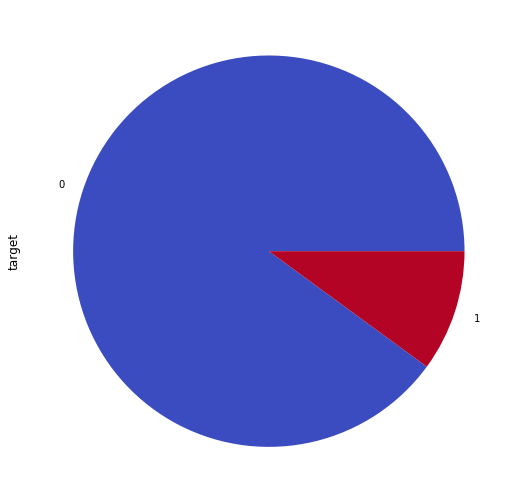

In [7]:
train['target'].value_counts().plot(kind="pie", figsize=(12,9), colormap="coolwarm")

In [8]:
train.isna().sum().sum()

0

In [9]:
test.isna().sum().sum()

0

In [10]:
gc.collect();
train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [11]:
numerical_features = train.columns[2:]

Distributions columns


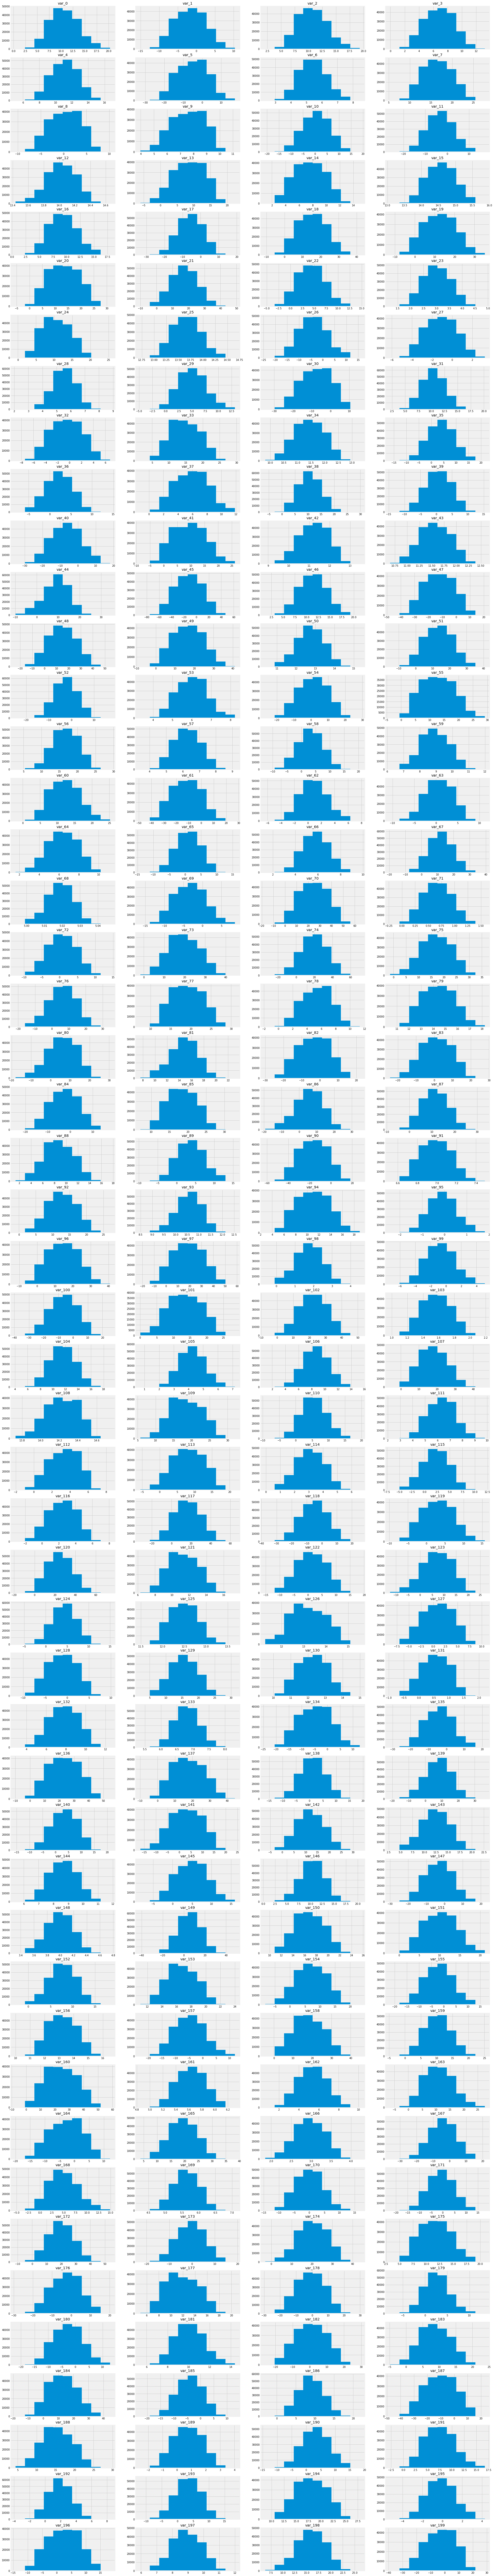

In [12]:
print('Distributions columns')
plt.figure(figsize=(30, 185))
for i, col in enumerate(numerical_features):
    plt.subplot(50, 4, i + 1)
    plt.hist(train[col]) 
    plt.title(col)
gc.collect();

Distributions columns


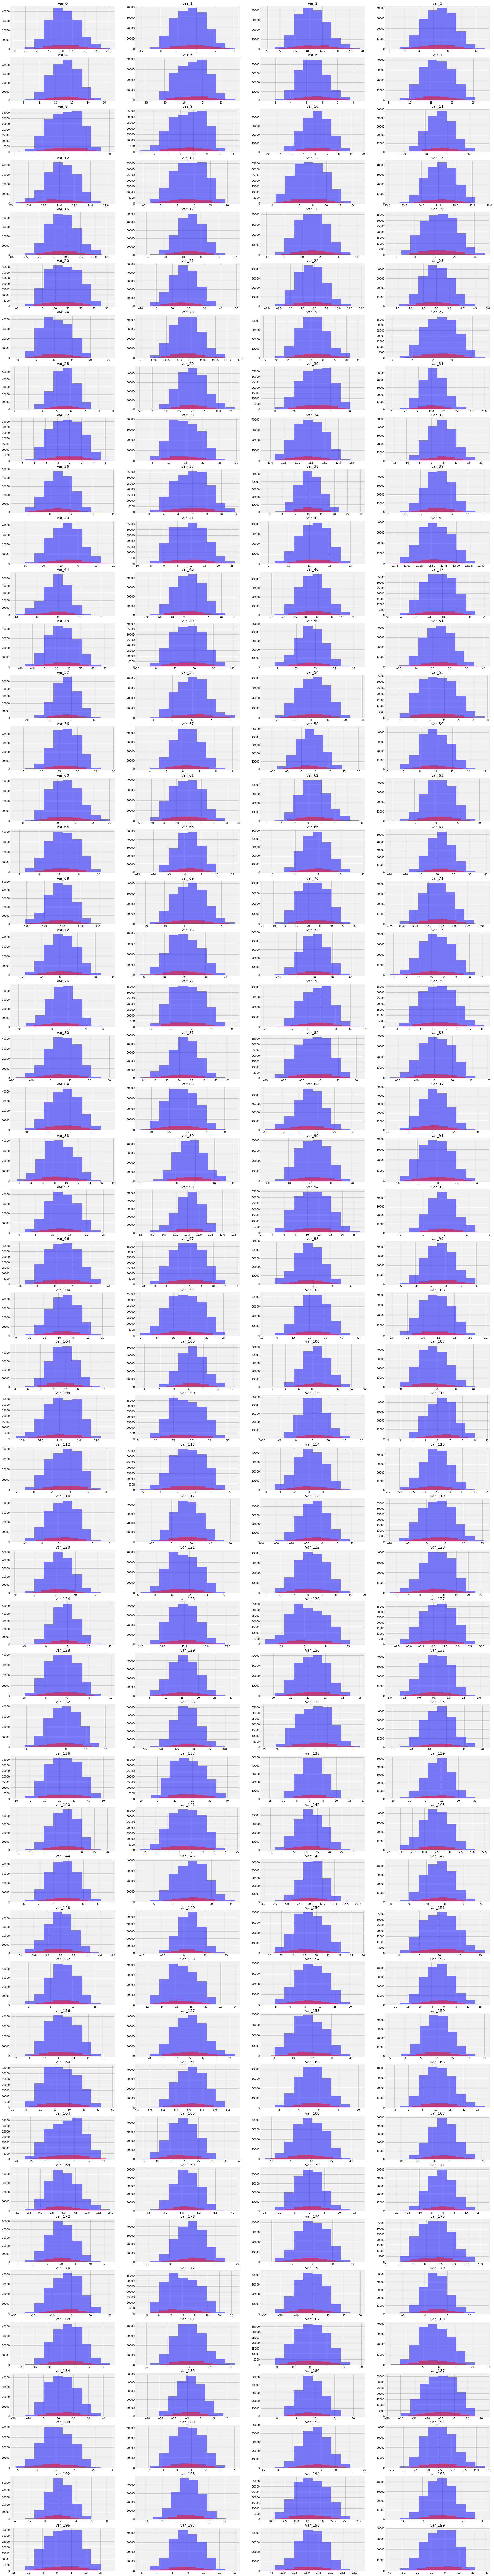

In [13]:
print('Distributions columns')
plt.figure(figsize=(30, 185))
for i, col in enumerate(numerical_features):
    plt.subplot(50, 4, i + 1)
    plt.hist(train[train["target"] == 0][col], alpha=0.5, label='0', color='b')
    plt.hist(train[train["target"] == 1][col], alpha=0.5, label='1', color='r')    
    plt.title(col)
gc.collect();

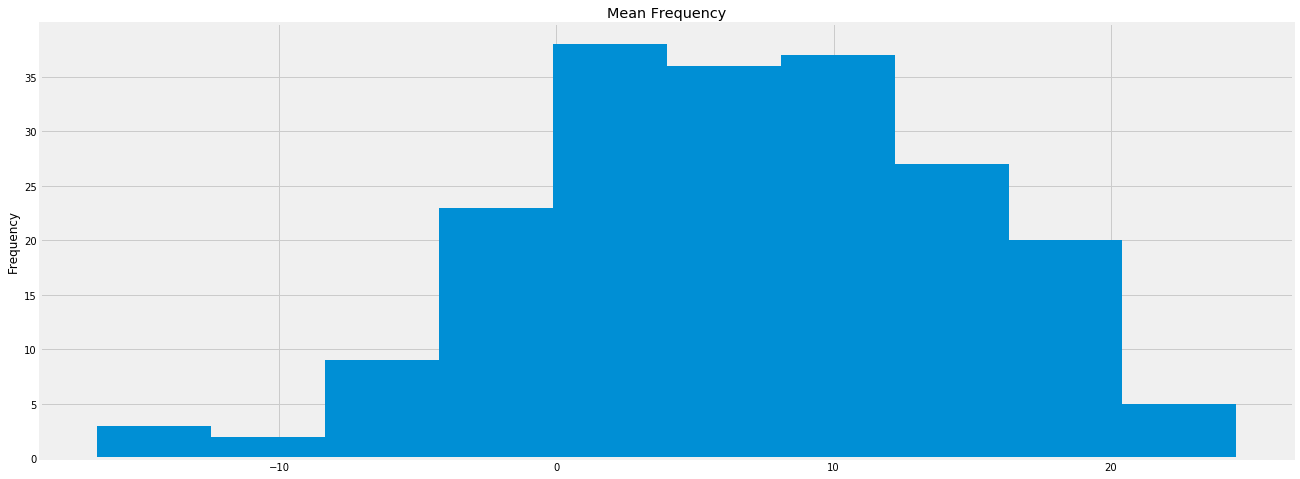

In [14]:
plt.figure(figsize=(20, 8))
train[numerical_features].mean().plot('hist');
plt.title('Mean Frequency');

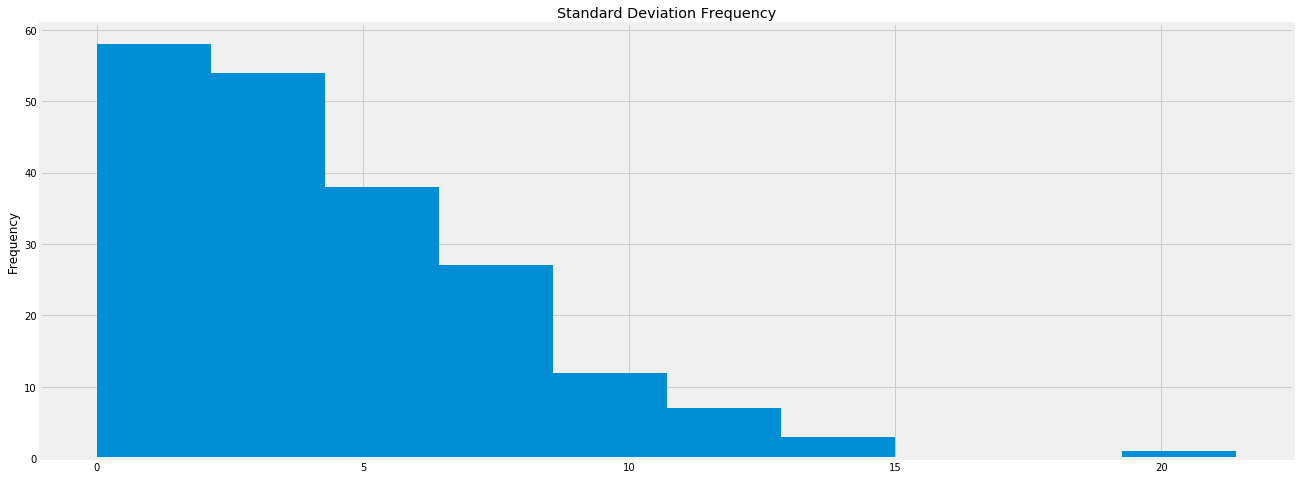

In [15]:
plt.figure(figsize=(20, 8))
train[numerical_features].std().plot('hist');
plt.title('Standard Deviation Frequency');

Most of the distributions show small std. deviations, and very few more than 20. Maybe a log transformation or a scaling technique to all features will alter the graph above to a normal one.


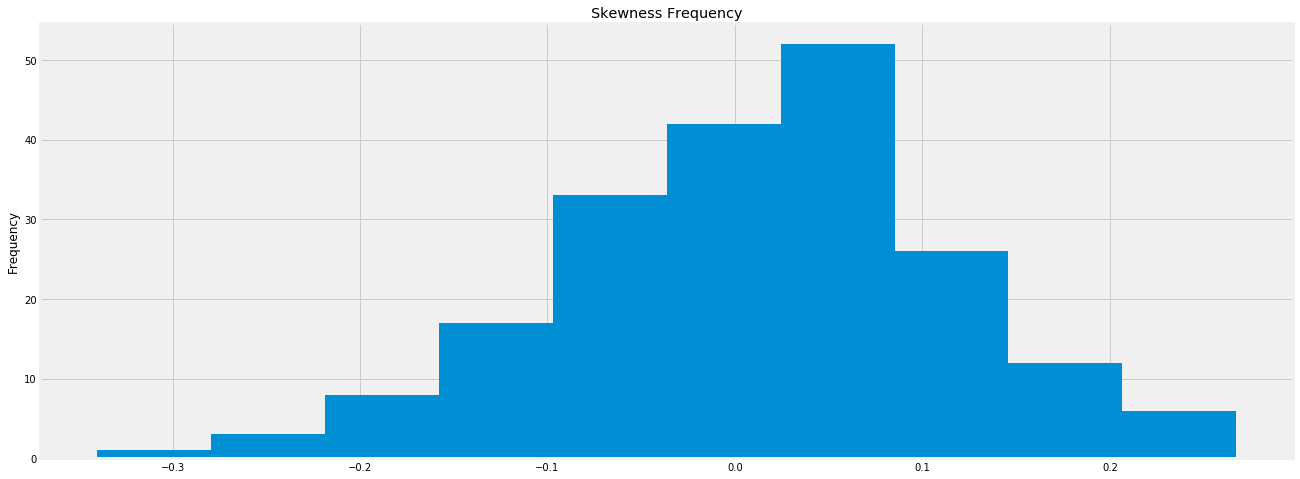

In [16]:
plt.figure(figsize=(20, 8))
train[numerical_features].skew().plot('hist');
plt.title('Skewness Frequency');

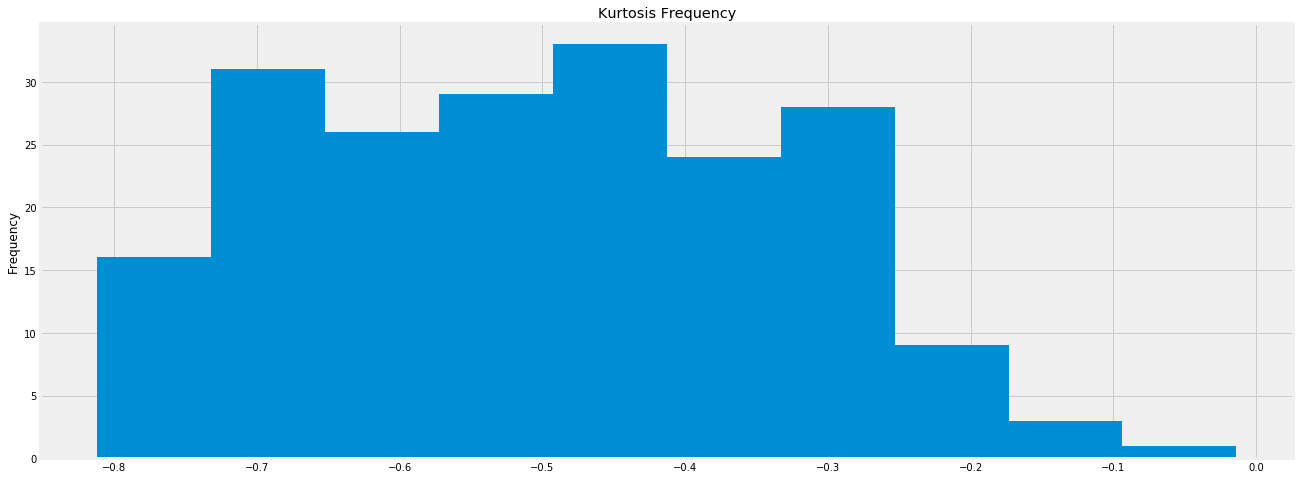

In [17]:
plt.figure(figsize=(20, 8))
train[numerical_features].kurt().plot('hist');
plt.title('Kurtosis Frequency');

Both Skewness and Kurtosis show that the features distributions are like a normal one

In [12]:
#checking outliers using Chauvenet's criterion
def chauvenet(array):
    mean = array.mean()           # Mean of incoming array
    stdv = array.std()            # Standard deviation
    N = len(array)                # Lenght of incoming array
    criterion = 1.0/(2*N)         # Chauvenet's criterion
    d = abs(array-mean)/stdv      # Distance of a value to mean in stdv's
    prob = erfc(d)                # Area normal dist.    
    return prob < criterion       # Use boolean array outside this function

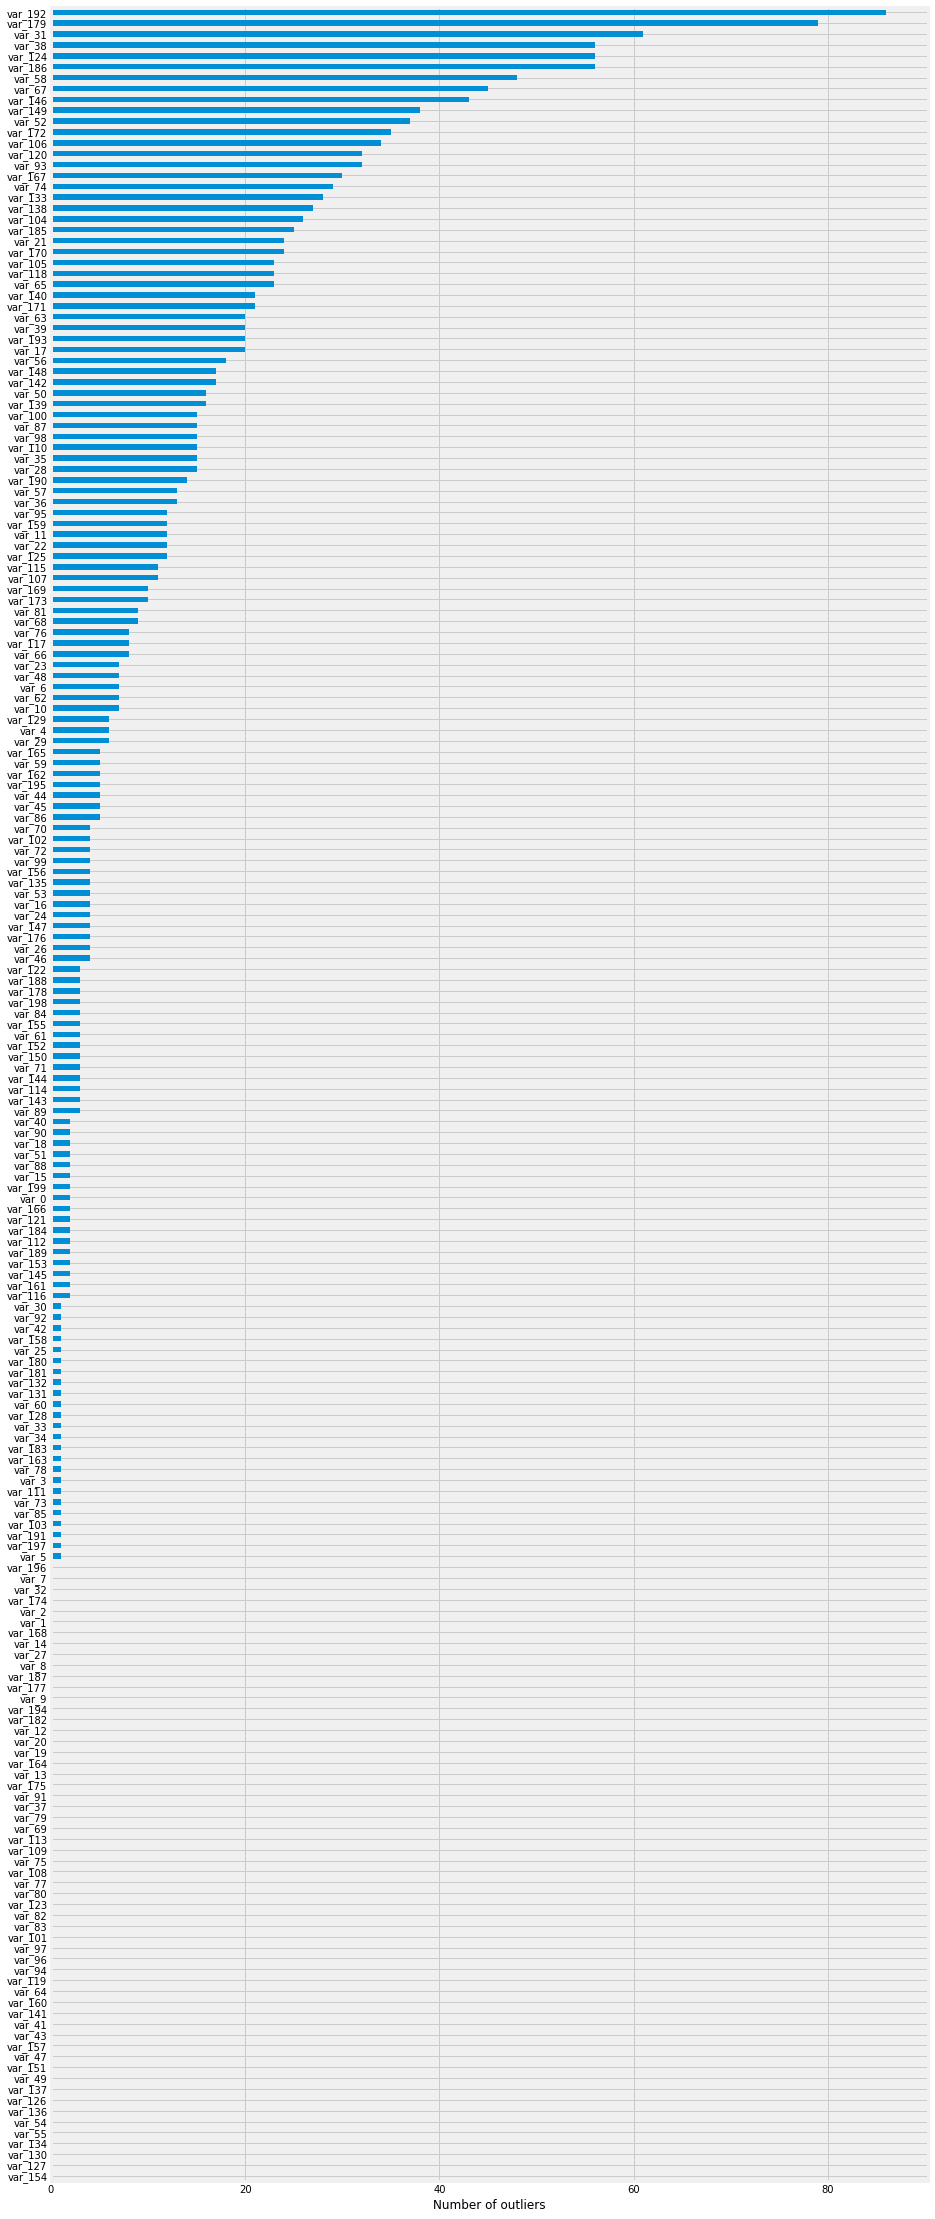

In [13]:
#outliers in each variable in train data 
train_outliers = dict()
for col in [col for col in numerical_features]:
    train_outliers[col] = train[chauvenet(train[col].values)].shape[0]
train_outliers = pd.Series(train_outliers)

train_outliers.sort_values().plot(figsize=(14, 40), kind='barh').set_xlabel('Number of outliers');

In [14]:
print('Total number of outliers in training set: {} ({:.2f}%)'.format(sum(train_outliers.values), (sum(train_outliers.values) / train.shape[0]) * 100))

Total number of outliers in training set: 1740 (0.87%)


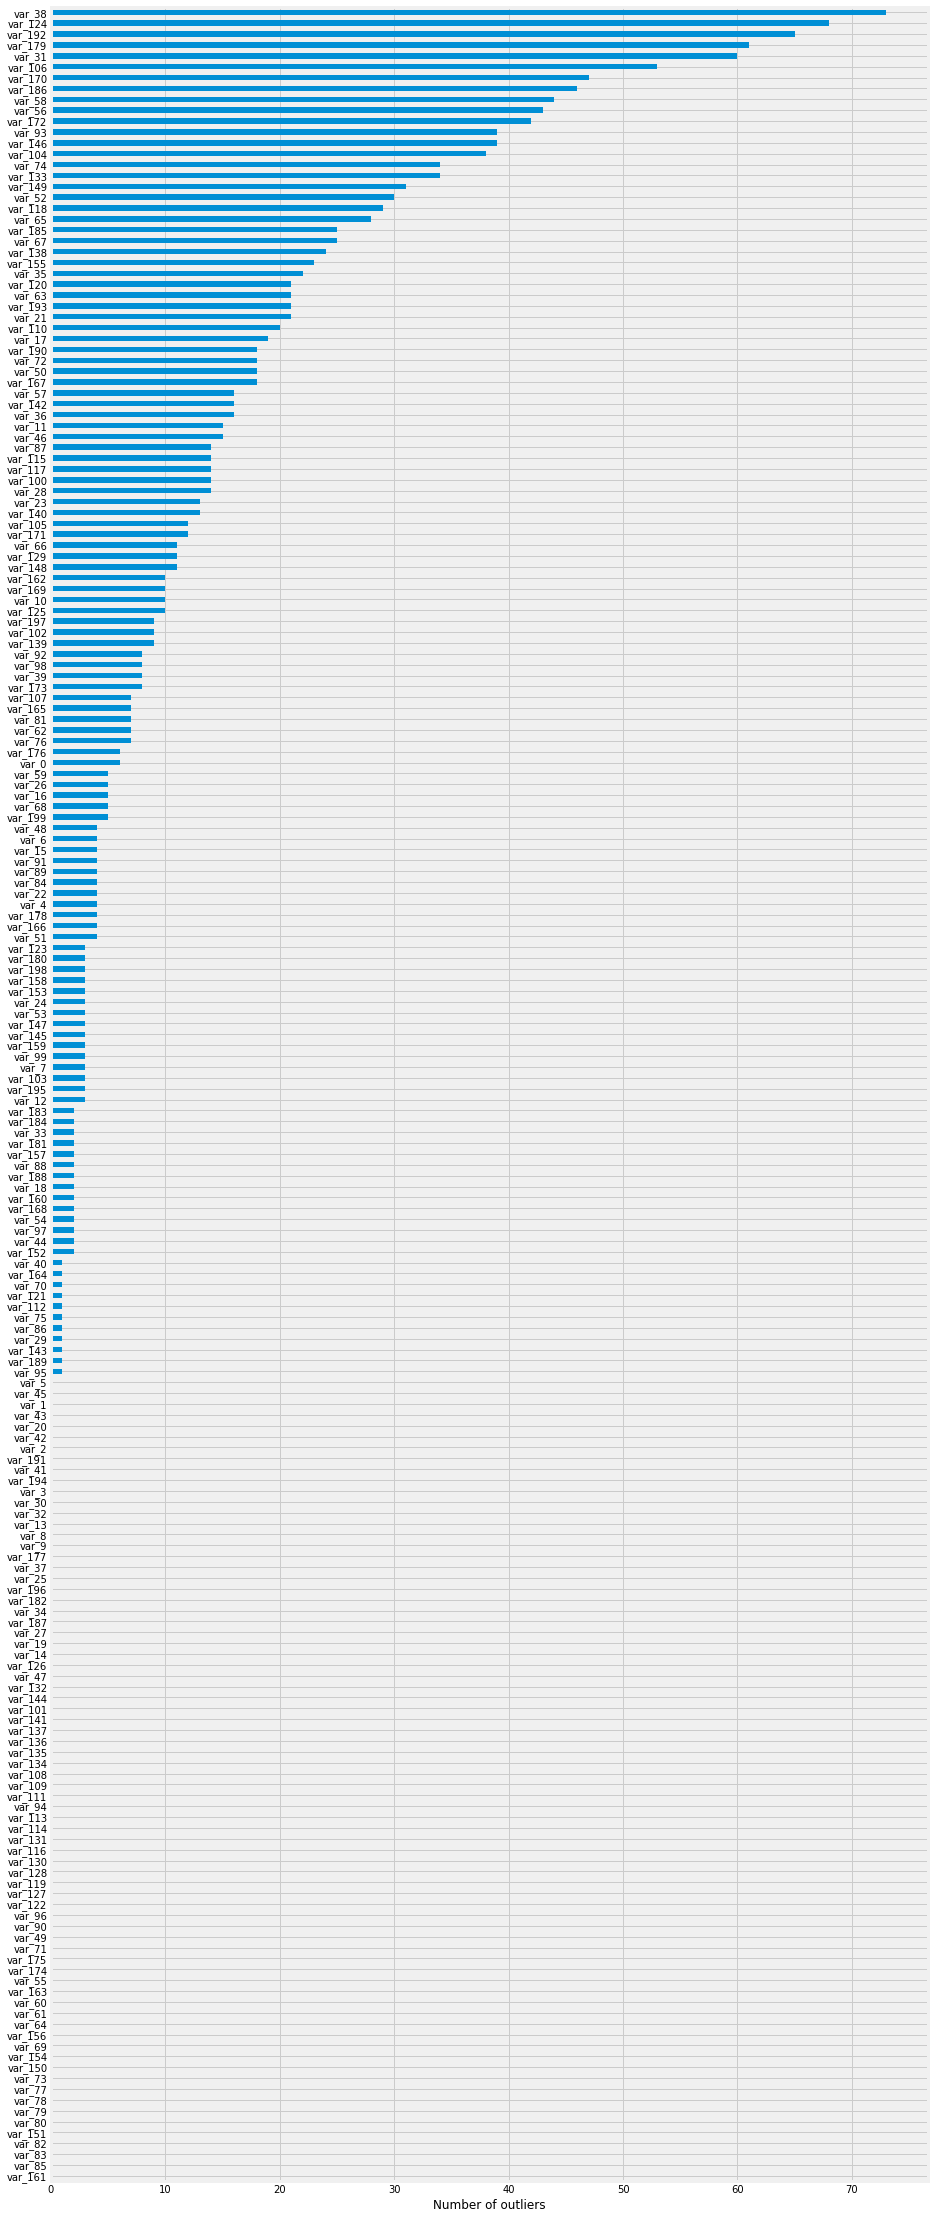

In [15]:
#outliers in each variable in test data 
test_outliers = dict()
for col in [col for col in numerical_features]:
    test_outliers[col] = test[chauvenet(test[col].values)].shape[0]
test_outliers = pd.Series(test_outliers)

test_outliers.sort_values().plot(figsize=(14, 40), kind='barh').set_xlabel('Number of outliers');

In [16]:
print('Total number of outliers in testing set: {} ({:.2f}%)'.format(sum(test_outliers.values), (sum(test_outliers.values) / test.shape[0]) * 100))

Total number of outliers in testing set: 1748 (0.87%)


In [17]:
#remove these outliers in train and test data
for col in numerical_features:
    train=train.loc[(~chauvenet(train[col].values))]
for col in numerical_features:
    test=test.loc[(~chauvenet(test[col].values))]    

In [18]:
#shape of train and test data after removal of outliers 
train.shape,test.shape

((198264, 202), (198250, 201))

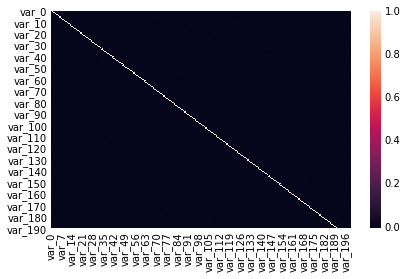

In [19]:
sns.heatmap(train[numerical_features].corr())

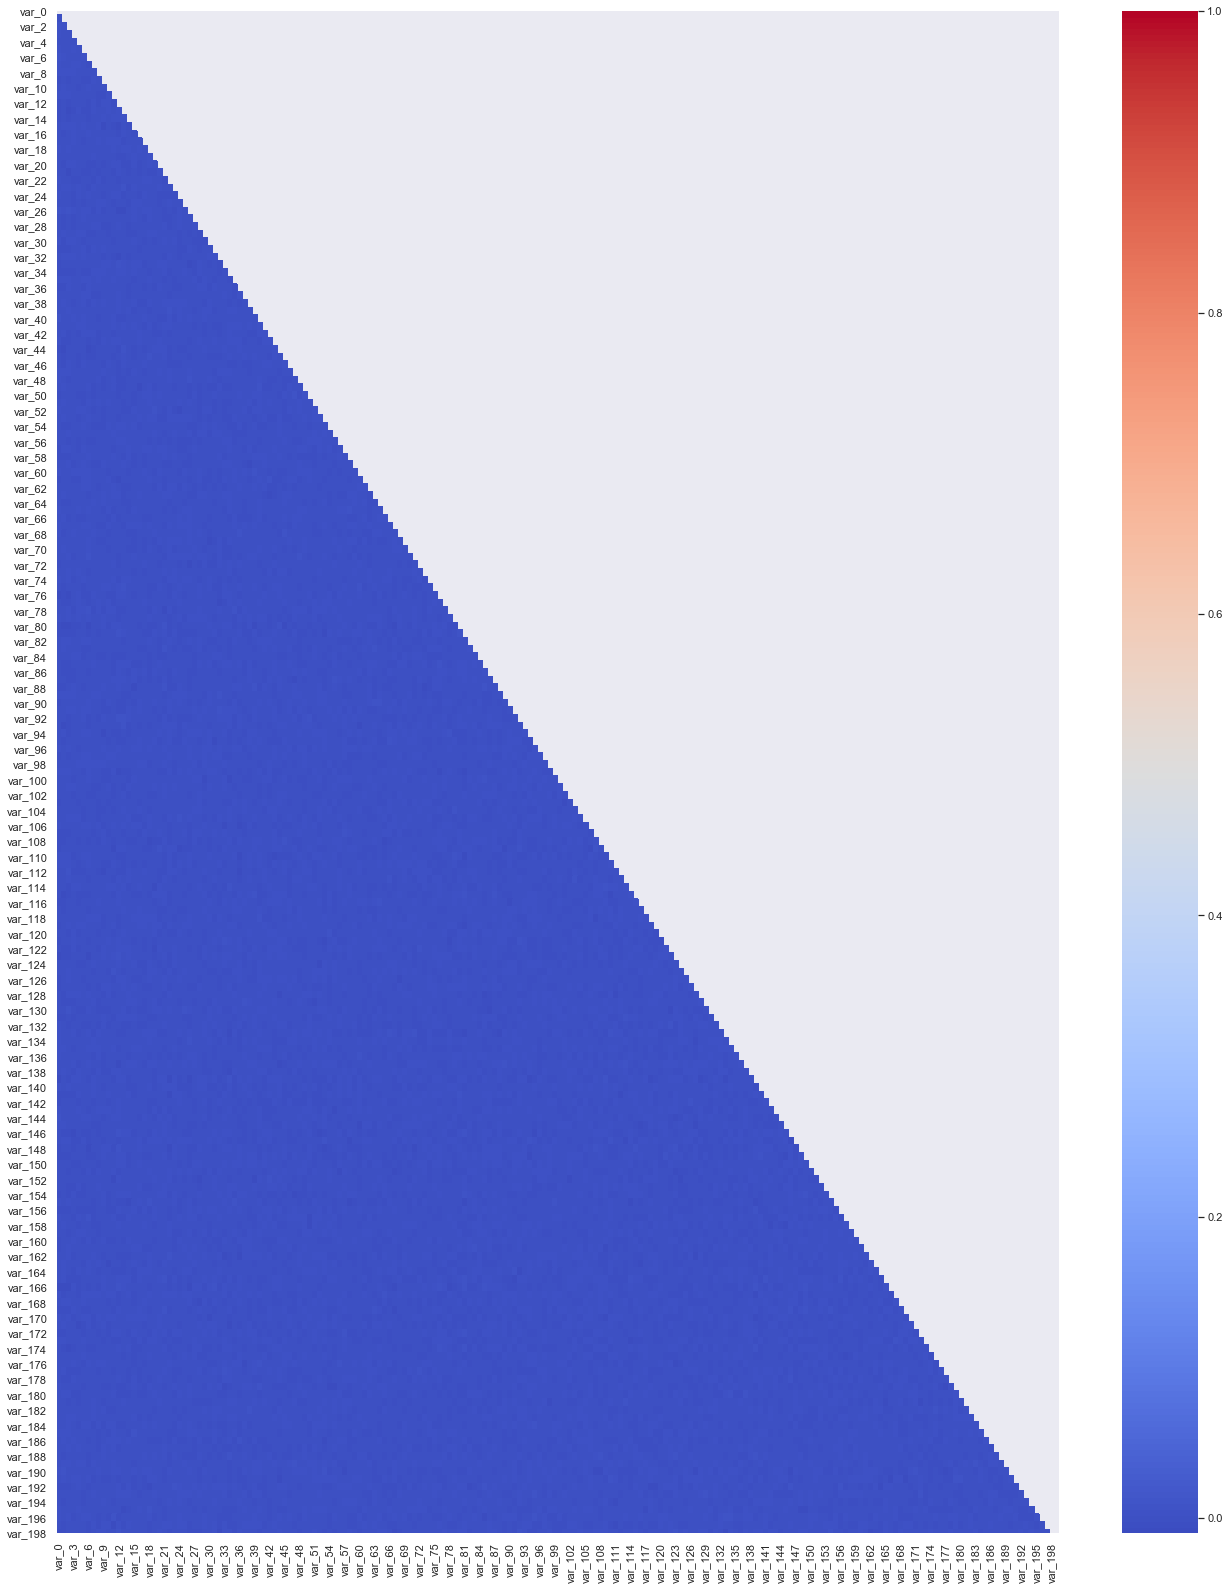

In [20]:
sns.set(rc={'figure.figsize':(20,28)})

# Compute the correlation matrix
corr = train[numerical_features].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, 
            #annot=True, 
            #fmt=".2f", 
            cmap='coolwarm')


EDA Summary
•We have 200 features that are mostly uncorrelated between them
•200 numerical features that their histograms have a shape like the one of a normal distribution


MODELING

In [21]:
# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC


In [22]:
train[numerical_features].head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [23]:
# divide data into train and test
X = train[numerical_features]
y = train.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4, stratify = y)

In [24]:
# print shapes of train and test sets
X_train.shape


(148698, 200)

In [25]:
y_train.shape

(148698,)

In [26]:
X_test.shape

(49566, 200)

Random Forest

In [26]:
# random forest - the class weight is used to handle class imbalance - it adjusts the cost function
forest = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)

# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [27]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 44.5min finished
C:\Users\venkata.dk\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight={0: 0.1, 1: 0.9},
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=-1,
                                              oob_score=False,
                                

In [28]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.660315265958166
Best hyperparameters:  {'criterion': 'entropy', 'max_features': 0.4}


In [29]:
# predict target on test data
y_pred = model.predict(X_test)

# create confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[44928    48]
 [ 4985    39]]
AUC:    	 0.65


In [28]:
print("accuracy is 0.8995")

accuracy is 0.8995


choosing best features

In [29]:
# run a random forest model on train data
max_features = int(round(np.sqrt(X_train.shape[1])))    # number of variables to consider to split each node
print(max_features)

rf_model = RandomForestClassifier(n_estimators=100, max_features=max_features, class_weight={0:0.1, 1: 0.9}, oob_score=True, random_state=4, verbose=1)

14


In [30]:
# fit model
rf_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 12.5min finished


RandomForestClassifier(bootstrap=True, class_weight={0: 0.1, 1: 0.9},
                       criterion='gini', max_depth=None, max_features=14,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=True,
                       random_state=4, verbose=1, warm_start=False)

In [31]:
# OOB score
rf_model.oob_score_

0.8995884275511439

In [35]:
# predict target on test data
y_pred = rf_model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))
ac=accuracy_score(y_test,y_pred)
print("accuracy:",ac)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    5.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[[44589     0]
 [ 4977     0]]
Sensitivity: 	0.0
Specificity: 	1.0
ROC:    	 0.78
accuracy: 0.8995884275511439


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    5.1s finished


In [33]:
ac=accuracy_score(y_test,y_pred)
print(ac)

0.8995884275511439


LOGISTIC REGRESSION

In [36]:
# logistic regression
steps = [('scaler', StandardScaler()), 
         ("logistic", LogisticRegression(class_weight={0:0.1, 1:0.9}))
        ]

# compile pipeline
logistic = Pipeline(steps)

# hyperparameter space
params = {'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [37]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  8.6min finished
C:\Users\venkata.dk\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('logistic',
                                        LogisticRegression(C=1.0,
                                                           class_weight={0: 0.1,
                                                                         1: 0.9},
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ra

In [38]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8590988473272022
Best hyperparameters:  {'logistic__C': 0.5, 'logistic__penalty': 'l1'}


In [39]:
# predict target on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))
ac=accuracy_score(y_test,y_pred)
print("Accuracy:",ac)

[[34944  9645]
 [ 1128  3849]]
Sensitivity: 	0.77
Specificity: 	0.78
ROC:    	 0.86
Accuracy: 0.7826534317879191


LIGHT GRADIENT BOOSTING METHOD LGBM

In [27]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

In [28]:
num_folds = 15
folds = StratifiedKFold(n_splits=num_folds, shuffle=False, random_state=2319)
oof = np.zeros(len(train))
predictions = np.zeros(len(test))
features = [c for c in train.columns if c not in ['ID_code', 'target']]

In [29]:
print('Creating Parameter Grid')
param = {
    'bagging_freq': 5,          'bagging_fraction': 0.335,   'boost_from_average':'false',   'boost': 'gbdt',
    'feature_fraction': 0.041,   'learning_rate': 0.0083,     'max_depth': -1,                'metric':'auc',
    'min_data_in_leaf': 80,     'min_sum_hessian_in_leaf': 10.0,'num_leaves': 13,           'num_threads': 8,
    'tree_learner': 'serial',   'objective': 'binary',      'verbosity': 1
}
target = train['target']


Creating Parameter Grid


In [30]:
%%time
print('Starting cross-validation:')
for fold_, (trn_idx, val_idx) in enumerate(folds.split(train.values, target.values)):
    print("Fold idx:{}".format(fold_ + 1))
    trn_data = lgb.Dataset(train.iloc[trn_idx][features], label=target.iloc[trn_idx])
    val_data = lgb.Dataset(train.iloc[val_idx][features], label=target.iloc[val_idx])
    clf = lgb.train(param, trn_data, 1000000, valid_sets = [trn_data, val_data], verbose_eval=5000, early_stopping_rounds = 4000)
    oof[val_idx] = clf.predict(train.iloc[val_idx][features], num_iteration=clf.best_iteration)
    predictions += clf.predict(test[features], num_iteration=clf.best_iteration) / folds.n_splits
print("CV score: {:<8.5f}".format(roc_auc_score(target, oof)))

Starting cross-validation:
Fold idx:1
Training until validation scores don't improve for 4000 rounds
[5000]	training's auc: 0.924561	valid_1's auc: 0.898331
[10000]	training's auc: 0.940113	valid_1's auc: 0.901437
[15000]	training's auc: 0.952745	valid_1's auc: 0.902029
Early stopping, best iteration is:
[14192]	training's auc: 0.950879	valid_1's auc: 0.902173
Fold idx:2
Training until validation scores don't improve for 4000 rounds
[5000]	training's auc: 0.925132	valid_1's auc: 0.891559
[10000]	training's auc: 0.940652	valid_1's auc: 0.893459
[15000]	training's auc: 0.953236	valid_1's auc: 0.893398
Early stopping, best iteration is:
[11463]	training's auc: 0.944565	valid_1's auc: 0.893785
Fold idx:3
Training until validation scores don't improve for 4000 rounds
[5000]	training's auc: 0.924317	valid_1's auc: 0.901673
[10000]	training's auc: 0.940057	valid_1's auc: 0.904067
[15000]	training's auc: 0.952713	valid_1's auc: 0.903984
Early stopping, best iteration is:
[12016]	training's auc

In [1]:
lgb_acu=accuracy_score(lgb_pred2,target)
lgb_pre=precision_score(lgb_pred2, target)
lgb_rec=recall_score(lgb_pred2,target)
lgb_f1=f1_score(lgb_pred2, target)

print("Accuracy Score for LightGBM is ",lgb_acu)
print("Precision Score for  LightGBM is ",lgb_pre)
print("Recall Score for LightGBM is ",lgb_rec)
print("f1 Score for LightGBM is ",lgb_f1)

NameError: name 'accuracy_score' is not defined

In [32]:
print('Writing results to a text file')
sub = pd.DataFrame({"ID_code": test.ID_code.values})
sub["target"] = predictions
sub.to_csv('lgbm_submission.csv', index=False)

Writing results to a text file
